#Paso 1 Análisis Exploratorio de Datos (EDA)


In [9]:
import pandas as pd #manejo y análisis de datos
import numpy as np # cálculo numerico y el análisis de datos
import seaborn as sns #creción de graficos estadísticos
import matplotlib.pyplot as plt # creacion de graficos en dos dimensiones
import plotly.graph_objs as go # creacion de gráficos en tres dimensiones
import plotly.express as px # creación de gráficos en tres dimensiones

from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder
# librerías para implementar modelo Kmeans

from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
#librerias para evaluar el modelo

import warnings 
warnings.filterwarnings('ignore')
#libreria para evitar la advertencia de que el modelo KMeans tiene una perdida de memoria windows

In [11]:
#Lectura de datos Pythin y se carga en la variable datos
df = pd.read_csv("C:/Users/PERSONAL/Documents/Mall_Customers.csv") #Lectura de datos en Phyton y se carga en variable df


In [33]:
#Lectura de datos para el analisis exploratorio
df.head(40)


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
5,6,Female,22,17,76
6,7,Female,35,18,6
7,8,Female,23,18,94
8,9,Male,64,19,3
9,10,Female,30,19,72


In [17]:
#descripcion de los datos
df.describe()


,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


Text(0.5, 1.0, 'Identificación de datos faltantes y atípicos')

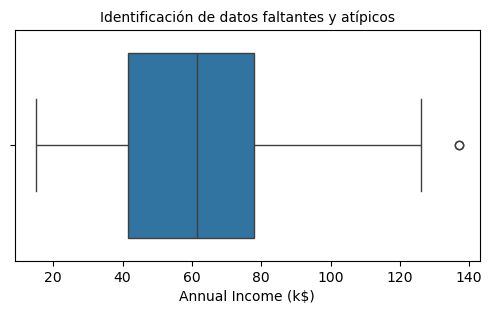

In [21]:
#Identificación de datos faltantes y atipicos 
plt.figure(figsize=(6,3))
sns.boxplot(x=df['Annual Income (k$)'])
plt.title('Identificación de datos faltantes y atípicos', fontsize=10)


#2. Preprocesar los datos limpiándolos, tratando valores faltantes y transformándolos según sea necesario. 


In [27]:
#Revisión de datos faltantes
print("cantidad de registros con cero en edad: ", df['Age'].isin([0]).sum())
print("cantidad de registros con cero en salario: ",df['Annual Income (k$)'].isin([0]).sum())
print("cantidad de registros con cero en data credito: ",df['Spending Score (1-100)'].isin([0]).sum())


cantidad de registros con cero en edad:  0
cantidad de registros con cero en salario:  0
cantidad de registros con cero en data credito:  0


In [31]:
#reemplazar todos los ceros con el valor medio (promedio) de la columna
df['Annual Income (k$)']=df['Annual Income (k$)'].replace(0,df['Annual Income (k$)'].mean())

Text(0.5, 1.0, 'identificación de datos atípicos')

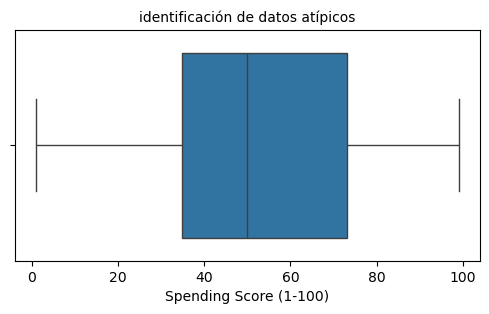

In [35]:
#identificación de datos atíicos
plt.figure(figsize=(6,3))
sns.boxplot(x=df['Spending Score (1-100)'])
plt.title('identificación de datos atípicos', fontsize=10)


In [37]:
#conteo de datos atípicos
nivel_minimo=0
nivel_maximo=100
Total_atípicos=((df['Spending Score (1-100)']<nivel_minimo)| (df['Spending Score (1-100)']>nivel_maximo)).sum()
print ("el total de datos atípicos es {}".format(Total_atípicos))

el total de datos atípicos es 0


In [39]:
#filtrar datos atipicos
df=df[(df['Spending Score (1-100)']<nivel_maximo)&(df['Spending Score (1-100)']>nivel_minimo)]

In [41]:
#revision del tipo de datos y datos faltantes
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


3. Seleccionar las características más relevantes para entrenar el
modelo utilizando selección de características.

Caracteristicas de interes para el agrupamiento
-Annual Income (k$) = Ingresos anuales
-Spending Score (1-100)= puntuación
-Age= edad


In [45]:
#filtra columnas del modelo
df=df[["Age", "Annual Income (k$)", "Spending Score (1-100)"]]

In [47]:
#revisión de los datos de las variables objetivo
df.head(10)

,Age,Annual Income (k$),Spending Score (1-100)
0,19,15,39
1,21,15,81
2,20,16,6
3,23,16,77
4,31,17,40
5,22,17,76
6,35,18,6
7,23,18,94
8,64,19,3
9,30,19,72


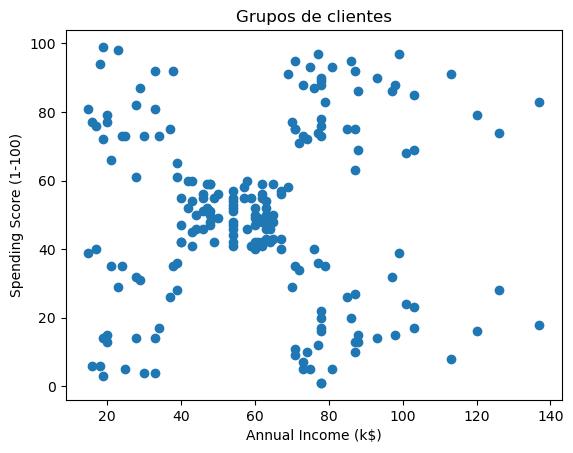

In [49]:
#grafica antes del agrupamiento
plt.scatter(df['Annual Income (k$)'], df['Spending Score (1-100)'])
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.title('Grupos de clientes')
plt.show()


4. Entrenar el modelo configurando los diferentes hiperparámetros.

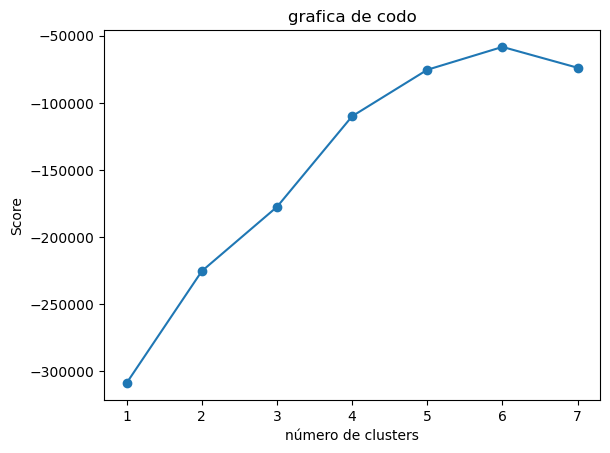

In [52]:
# gráfica de codo para identificar el valor K

Nc = range(1, 8)
kmeans=[KMeans(n_clusters=i) for i in Nc]
kmeans
score=[kmeans[i].fit(df).score(df) for i in range(len(kmeans))]
score
plt.plot(Nc,score,marker='o')
plt.xlabel('número de clusters')
plt.ylabel('Score')
plt.title('grafica de codo')
plt.show()


In [84]:
#generacion del modelo de agrupamiento del modelo de K=5 (Es decir que se haran 5 grupos de agrupamiento)
Modelo=KMeans(n_clusters=6, random_state=0)
Modelo.fit(df)


KMeans(n_clusters=6, random_state=0)

In [71]:
#Se agrega la columna grupo a la BD para identificar el numero del grupo de agrupamiento, etiquetas.
Modelo.labels_
df["Grupo"] = Modelo.labels_
print(df)

     Age  Annual Income (k$)  Spending Score (1-100)  Grupo
0     19                  15                      39      5
1     21                  15                      81      2
2     20                  16                       6      5
3     23                  16                      77      2
4     31                  17                      40      5
..   ...                 ...                     ...    ...
195   35                 120                      79      1
196   45                 126                      28      3
197   32                 126                      74      1
198   32                 137                      18      3
199   30                 137                      83      1

[200 rows x 4 columns]


5. Evaluar el desempeño del modelo con métricas como Coeficiente
de Silhouette, Índice de Calinski-Harabasz, etc.


In [86]:
#Desempeaño del modelo con el coeficiente de silhouette el indice de calinski-harabasz y el indice de davies bouldin socre

#preparacion de la mterica de la columna grupo
Observaciones= len(df)
X= df.drop('Grupo', axis=1)
clusters=df['Grupo']

# se calculan las metricas
sil_score=silhouette_score(X,clusters)
calinski_score = calinski_harabasz_score(X,clusters)
davies_score = davies_bouldin_score(X,clusters)

#se crea una tabla para mostrar los valores de las metricas
table_data=[
    ["número de observaciones", Observaciones],
    ["Coeficiente Silhouette", sil_score],
    ["Indice Calinsju Harabasz", calinski_score],
    ["Indice  Davies Bouldin", davies_score]
]
#imprime la tabla
from tabulate import tabulate
print(tabulate(table_data, headers=["Metric", "Value"], tablefmt='pretty'))


+--------------------------+---------------------+
|          Metric          |        Value        |
+--------------------------+---------------------+
| número de observaciones  |         200         |
|  Coeficiente Silhouette  | 0.45095124469943243 |
| Indice Calinsju Harabasz |  166.5857109469557  |
|  Indice  Davies Bouldin  | 0.7515325100425706  |
+--------------------------+---------------------+


6. Realizar las diferentes gráficas que permitan visualizar los
resultados del modelo

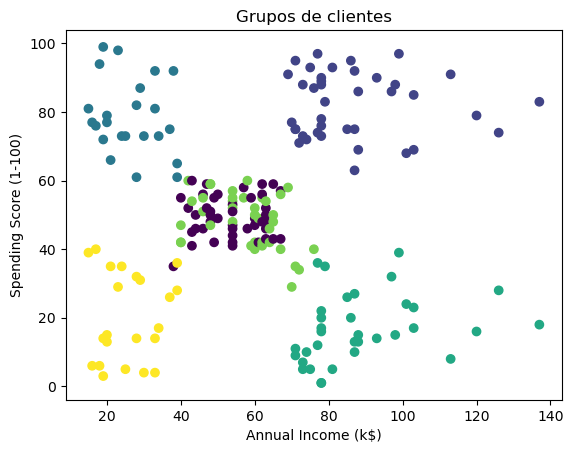

In [79]:
plt.scatter(df['Annual Income (k$)'], df['Spending Score (1-100)'], c=df['Grupo'], cmap='viridis')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.title('Grupos de clientes')
plt.show()

7. Interpretar, analizar y documentar los resultados obtenidos.

-Coeficiente de Silhouette (0.451): Es un valor más alto que el de K-means (0.377).

Indica una mejor separación y cohesión entre clusters que con K-means.

Es un resultado estable. 

-Índice Calinski-Harabasz (166.59): También supera el valor obtenido con K-means (133.49).

Refuerza que la estructura de los clusters es más clara en el modelo jerárquico.

-Índice Davies-Bouldin (0.752):

Este valor es más bajo que con K-means (0.984).

Esto indica menos superposición entre los grupos, mejor calidad de agrupación. 

El modelo de clustering jerárquico ha mostrado un mejor rendimiento en comparación con K-means, según las tres métricas utilizadas. El coeficiente de Silhouette más alto y el índice de Davies-Bouldin más bajo indican que los clusters están mejor definidos y son más coherentes. Además, el mayor valor de Calinski-Harabasz confirma que existe una estructura clara entre los grupos. El análisis de clustering permitió identificar distintos perfiles de solicitantes de crédito. Se observó que los grupos con mayor viabilidad crediticia (puntuación 80–100) tienden a compartir características como ingresos estables, bajo nivel de endeudamiento. Esto sugiere que la puntuación de viabilidad se relaciona con factores económicos y personales concretos. Esta segmentación puede ser útil para definir políticas de aprobación, gestionar el riesgo crediticio y diseñar estrategias de fidelización personalizadas.



